## Overall Goal: To compare the performance and risk of four individual assets against the NASDAQ Composite benchmark over an 8-year period (starting from 2018) to evaluate their returns, volatility, and overall investment viability

This code is divided into three sections, starting from the calculation of the returns of each asset, proceeding to compute linear regression analysis, and lastly visualizing these results with the market benchmark.


#### Section 1: Compute daily and cumulative returns for each asset, visualize the distribution of results using time-series plots and box plots, and calculate both daily and annualized standard deviations to measure volatility.

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf 
%matplotlib inline
import statsmodels.api as sm
from statsmodels import regression

In [5]:
#Importing data for assets

end = dt.datetime.now()
start = dt.datetime(2018,1,1)
data = yf.download(['^IXIC','TSLA','PCAR','UAL','AAL'],start=start, end=end).Close
data.head(2)

C:\Users\Wale\AppData\Local\Temp\ipykernel_15784\1444430261.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(['^IXIC','TSLA','PCAR','UAL','AAL'],start=start, end=end).Close
[*********************100%***********************]  5 of 5 completed


Ticker,AAL,PCAR,TSLA,UAL,^IXIC
Date,,,,,
2018-01-02,51.647560,35.742508,21.368668,68.940002,7006.899902
2018-01-03,51.014023,36.178165,21.150000,68.489998,7065.529785


#### Calculate returns for the respective assets

In [7]:
data_daily_returns = data.pct_change().dropna()
data_daily_returns.head()

Ticker,AAL,PCAR,TSLA,UAL,^IXIC
Date,,,,,
2018-01-03,-0.012267,0.012189,-0.010233,-0.006527,0.008367
2018-01-04,0.006305,0.012718,-0.008290,0.011243,0.001752
2018-01-05,-0.000380,0.003340,0.006230,0.001444,0.008286
2018-01-08,-0.009877,-0.003196,0.062638,-0.012255,0.002919
2018-01-09,-0.000959,-0.000401,-0.008085,-0.000438,0.000865


##### Rename columns

In [9]:
data_daily_returns.columns = ["TSLA","PCAR","UAL","AAL","NASDAQ_COMPOSITE"]
data_daily_returns.head()


,TSLA,PCAR,UAL,AAL,NASDAQ_COMPOSITE
Date,,,,,
2018-01-03,-0.012267,0.012189,-0.010233,-0.006527,0.008367
2018-01-04,0.006305,0.012718,-0.008290,0.011243,0.001752
2018-01-05,-0.000380,0.003340,0.006230,0.001444,0.008286
2018-01-08,-0.009877,-0.003196,0.062638,-0.012255,0.002919
2018-01-09,-0.000959,-0.000401,-0.008085,-0.000438,0.000865


##### Creating Plots to visualise the returns of each individual assets 

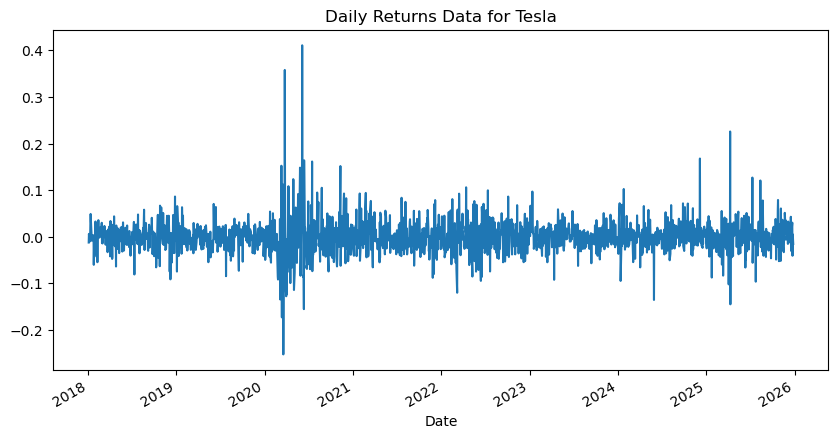

In [11]:
data_daily_returns["TSLA"].plot(figsize = (10,5), title = "Daily Returns Data for Tesla")
plt.show()

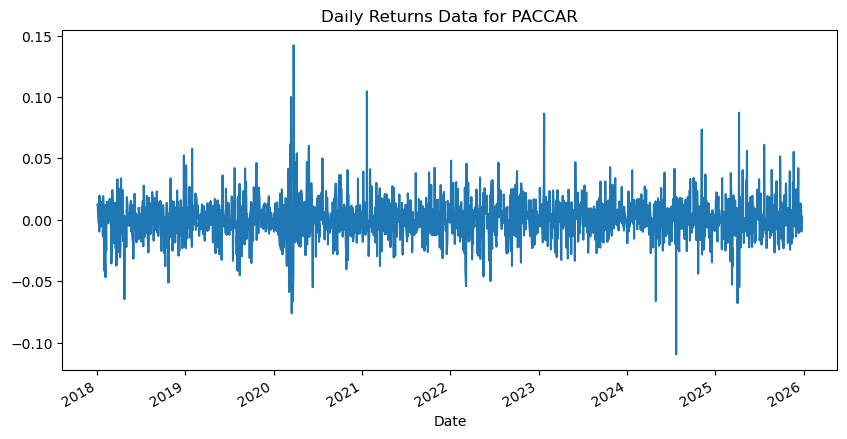

In [12]:
data_daily_returns["PCAR"].plot(figsize = (10,5), title = "Daily Returns Data for PACCAR")
plt.show()

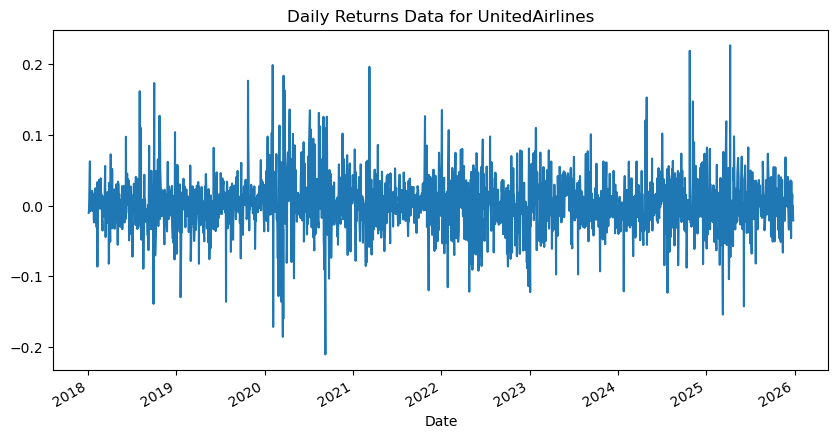

In [13]:
data_daily_returns["UAL"].plot(figsize = (10,5), title = "Daily Returns Data for UnitedAirlines")
plt.show()

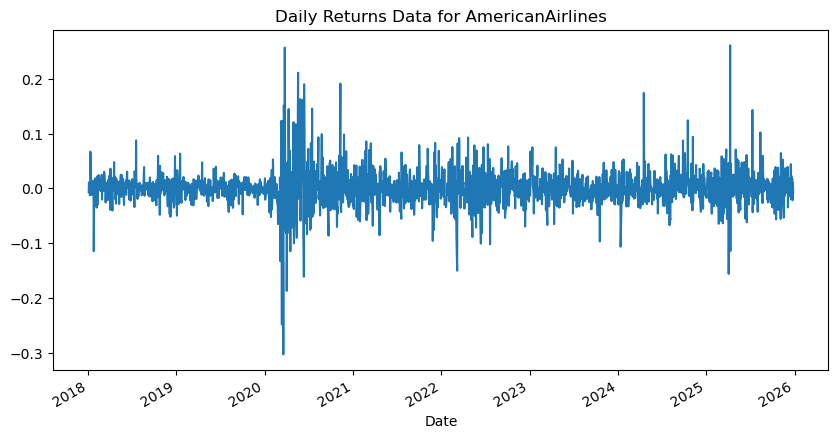

In [14]:
data_daily_returns["AAL"].plot(figsize = (10,5), title = "Daily Returns Data for AmericanAirlines")
plt.show()

In [15]:
data_daily_returns["NASDAQ_COMPOSITE"].plot(figsize = (10,5), title = "Daily Returns Data for NASDAQ_COMPOSITE")

<Axes: title={'center': 'Daily Returns Data for NASDAQ_COMPOSITE'}, xlabel='Date'>

##### Estimate cummulative returns of the respective assets and visualise them in a plot

In [17]:
cummulative_returns = (1+data_daily_returns).cumprod()
cummulative_returns.tail()

,TSLA,PCAR,UAL,AAL,NASDAQ_COMPOSITE
Date,,,,,
2025-12-19,0.305532,3.121493,22.518953,1.653467,3.326381
2025-12-22,0.314826,3.156186,22.871338,1.682913,3.343680
2025-12-23,0.302047,3.125690,22.722989,1.646794,3.362663
2025-12-24,0.303596,3.119815,22.715501,1.665361,3.370008
2025-12-26,0.298949,3.127648,22.237699,1.654192,3.367124


In [18]:
cummulative_returns.plot(figsize = (10,5), title = "Cummulative Returns for All The Assests")

<Axes: title={'center': 'Cummulative Returns for All The Assests'}, xlabel='Date'>

##### Create a box plot to visualise the distribution of the returns of the assets

In [20]:
data_daily_returns.plot.box(figsize = (10,5), title = "Box Plot of Daily Returns for All The Assets")

<Axes: title={'center': 'Box Plot of Daily Returns for All The Assets'}>

In [21]:
returns_without_index = data_daily_returns.drop(["NASDAQ_COMPOSITE"], axis = 1)
returns_without_index.plot.box(figsize = (10,5), title = "Box Plot of Equities Without Index")

<Axes: title={'center': 'Box Plot of Equities Without Index'}>

##### Estimate the standard deviation (volatility) and annualise it 

In [23]:
data_std_dev = data_daily_returns.std()
data_std_dev.sort_values()

NASDAQ_COMPOSITE    0.014976
PCAR                0.016965
AAL                 0.034383
TSLA                0.035462
UAL                 0.040129
dtype: float64

In [24]:
trading_days = 252
annualised_std_dev = data_std_dev*np.sqrt(trading_days)
annualised_std_dev.sort_values()

NASDAQ_COMPOSITE    0.237742
PCAR                0.269313
AAL                 0.545808
TSLA                0.562941
UAL                 0.637024
dtype: float64

The daily returns DataFrame and a 21-day rolling window is used to plot the rolling standard deviations of the assets and the index.

In [26]:
data_daily_returns.rolling(window=21).std().plot(figsize = (15,10), title = "21 Rolling Standard Deviation for The Assets")

<Axes: title={'center': '21 Rolling Standard Deviation for The Assets'}, xlabel='Date'>

The daily returns DataFrame and a 21-day rolling window is used to plot the rolling standard deviations without the index. 

In [28]:
returns_without_index.rolling(window=21).std().plot(figsize = (15,10), title = "21 Rolling Standard Deviation excluding the Index")

<Axes: title={'center': '21 Rolling Standard Deviation excluding the Index'}, xlabel='Date'>

Use the daily return DataFrame to calculate the annualized average return data for the assets. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [30]:
annual_returns = data_daily_returns.mean()*trading_days
annual_returns.sort_values()

TSLA                0.003418
PCAR                0.179325
NASDAQ_COMPOSITE    0.180802
AAL                 0.212284
UAL                 0.591521
dtype: float64

#### Section 2: Calculate risk-adjusted performance using the Sharpe ratio and perform linear regression analysis to determine the Alpha and Beta coefficients for each asset relative to the market benchmark.

Calculate the Sharpe ratios for the assets.

In [33]:
sharpe_ratios = annual_returns/data_std_dev
sharpe_ratios.sort_values()

TSLA                 0.096384
AAL                  6.174169
PCAR                10.570225
NASDAQ_COMPOSITE    12.072510
UAL                 14.740597
dtype: float64

In [34]:
sharpe_ratios.plot.bar(figsize = (10,7), title = "Sharpe ratios for the assets")

<Axes: title={'center': 'Sharpe ratios for the assets'}, xlabel='Date'>

In [35]:
rolling_mkt_var = data_daily_returns['NASDAQ_COMPOSITE'].rolling(window=60).var()
rolling_mkt_var.tail()

Date
2025-12-19    0.000137
2025-12-22    0.000137
2025-12-23    0.000137
2025-12-24    0.000137
2025-12-26    0.000137
Name: NASDAQ_COMPOSITE, dtype: float64

In [36]:
cov_TSLA =data_daily_returns['TSLA'].rolling(window=60).cov(data_daily_returns['NASDAQ_COMPOSITE'])
cov_TSLA.tail()

Date
2025-12-19    0.000123
2025-12-22    0.000125
2025-12-23    0.000122
2025-12-24    0.000122
2025-12-26    0.000123
dtype: float64

In [37]:
beta_TSLA = cov_TSLA/rolling_mkt_var
beta_TSLA.tail()

Date
2025-12-19    0.897220
2025-12-22    0.915921
2025-12-23    0.886590
2025-12-24    0.891942
2025-12-26    0.898465
dtype: float64

In [38]:
mean_TSLA_beta = beta_TSLA.mean()
mean_TSLA_beta

1.0074525915072554

In [39]:
beta_TSLA.plot(figsize = (15,10), title = "Rolling Beta for TSLA")

<Axes: title={'center': 'Rolling Beta for TSLA'}, xlabel='Date'>

In [40]:
cov_AAL =data_daily_returns['AAL'].rolling(window=60).cov(data_daily_returns['NASDAQ_COMPOSITE'])
cov_AAL.tail()

Date
2025-12-19    0.000153
2025-12-22    0.000155
2025-12-23    0.000152
2025-12-24    0.000154
2025-12-26    0.000156
dtype: float64

In [41]:
beta_AAL = cov_AAL/rolling_mkt_var
beta_AAL.tail()

Date
2025-12-19    1.114956
2025-12-22    1.129346
2025-12-23    1.111145
2025-12-24    1.120022
2025-12-26    1.139847
dtype: float64

In [42]:
mean_AAL_beta = beta_AAL.mean()
mean_AAL_beta

0.9378676294363344

In [43]:
beta_AAL.plot(figsize = (15,10), title = "Rolling Beta for AAL")

<Axes: title={'center': 'Rolling Beta for AAL'}, xlabel='Date'>

#### Section 3: Visualize the correlation between each asset and the benchmark using scatter plots and illustrate the relationship by plotting the line of best fit.

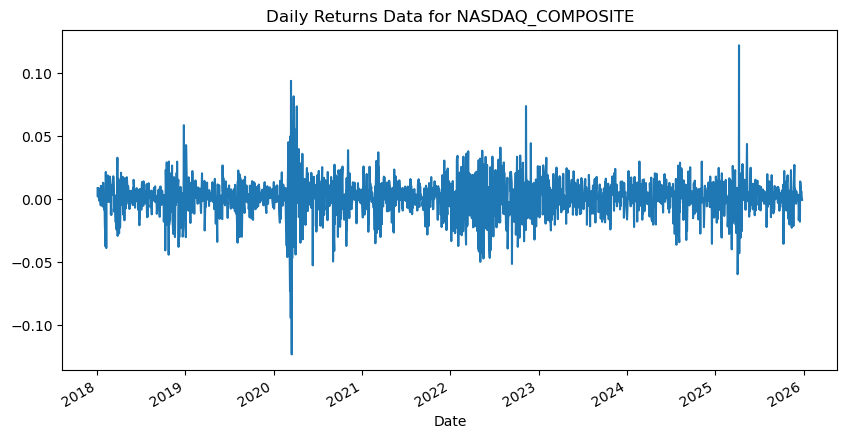

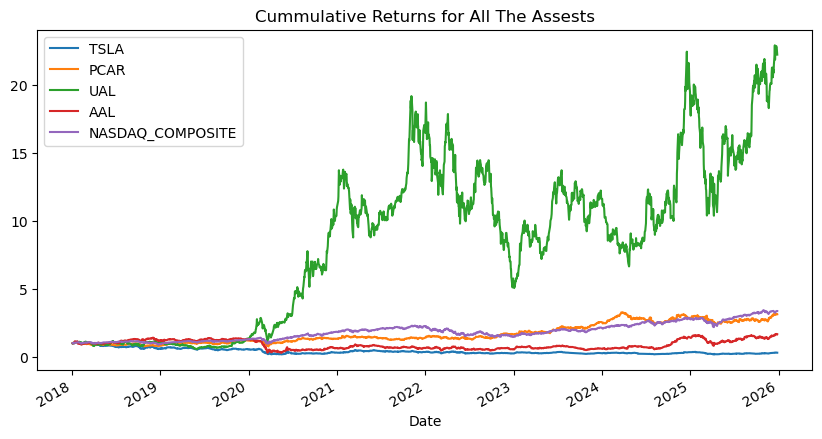

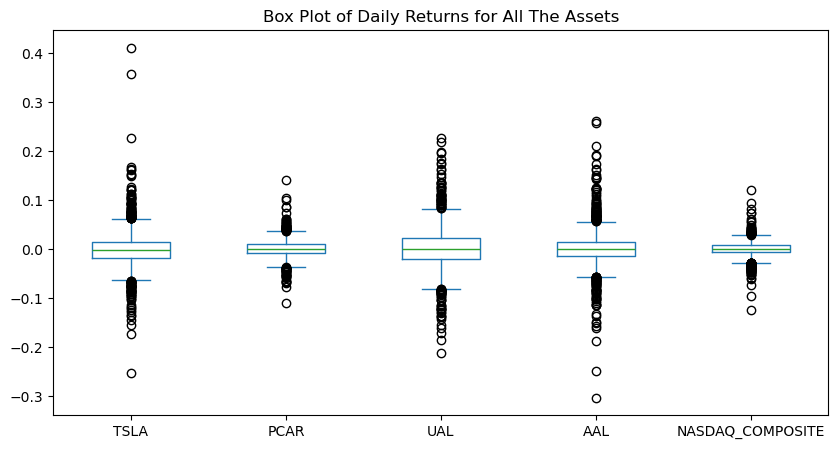

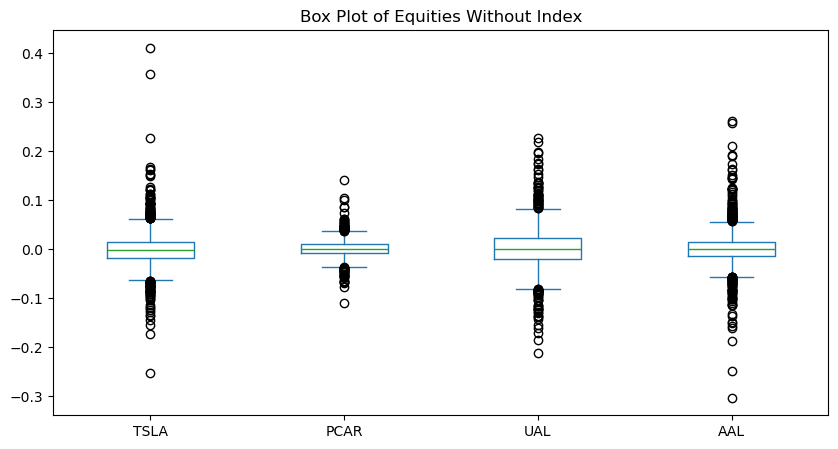

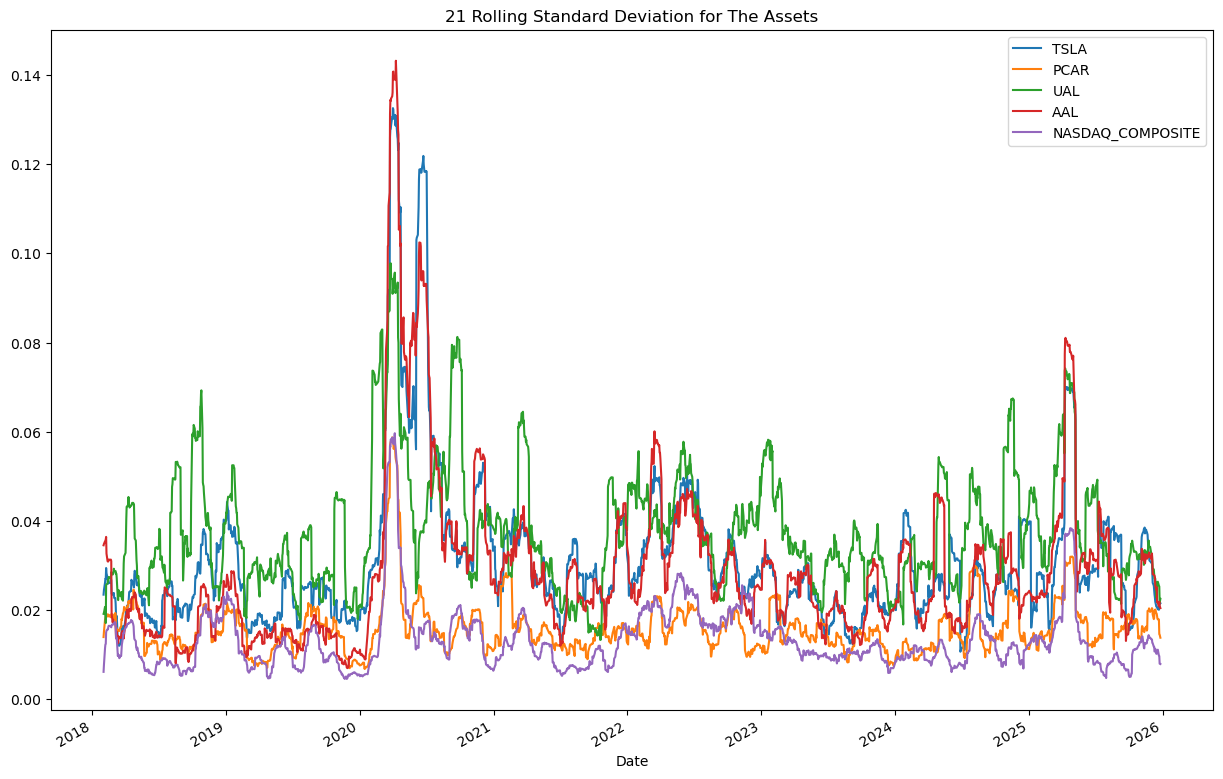

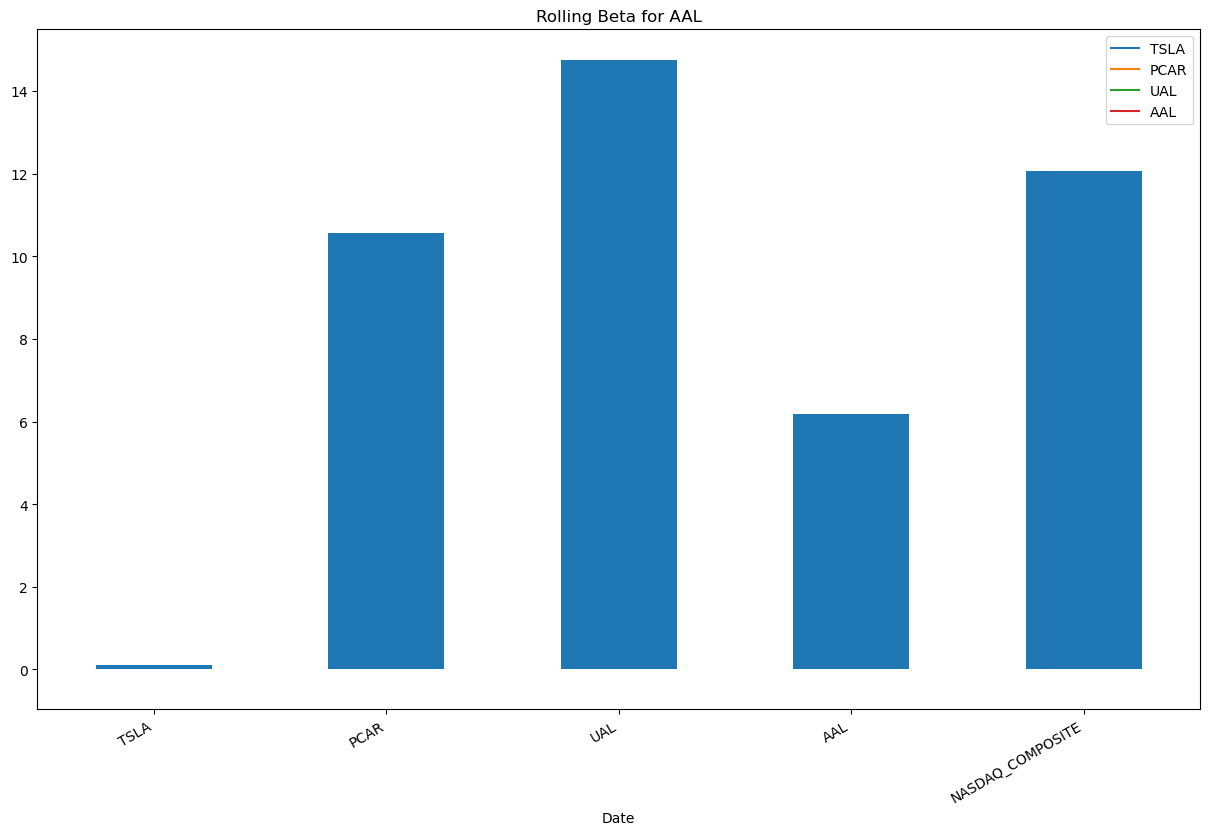

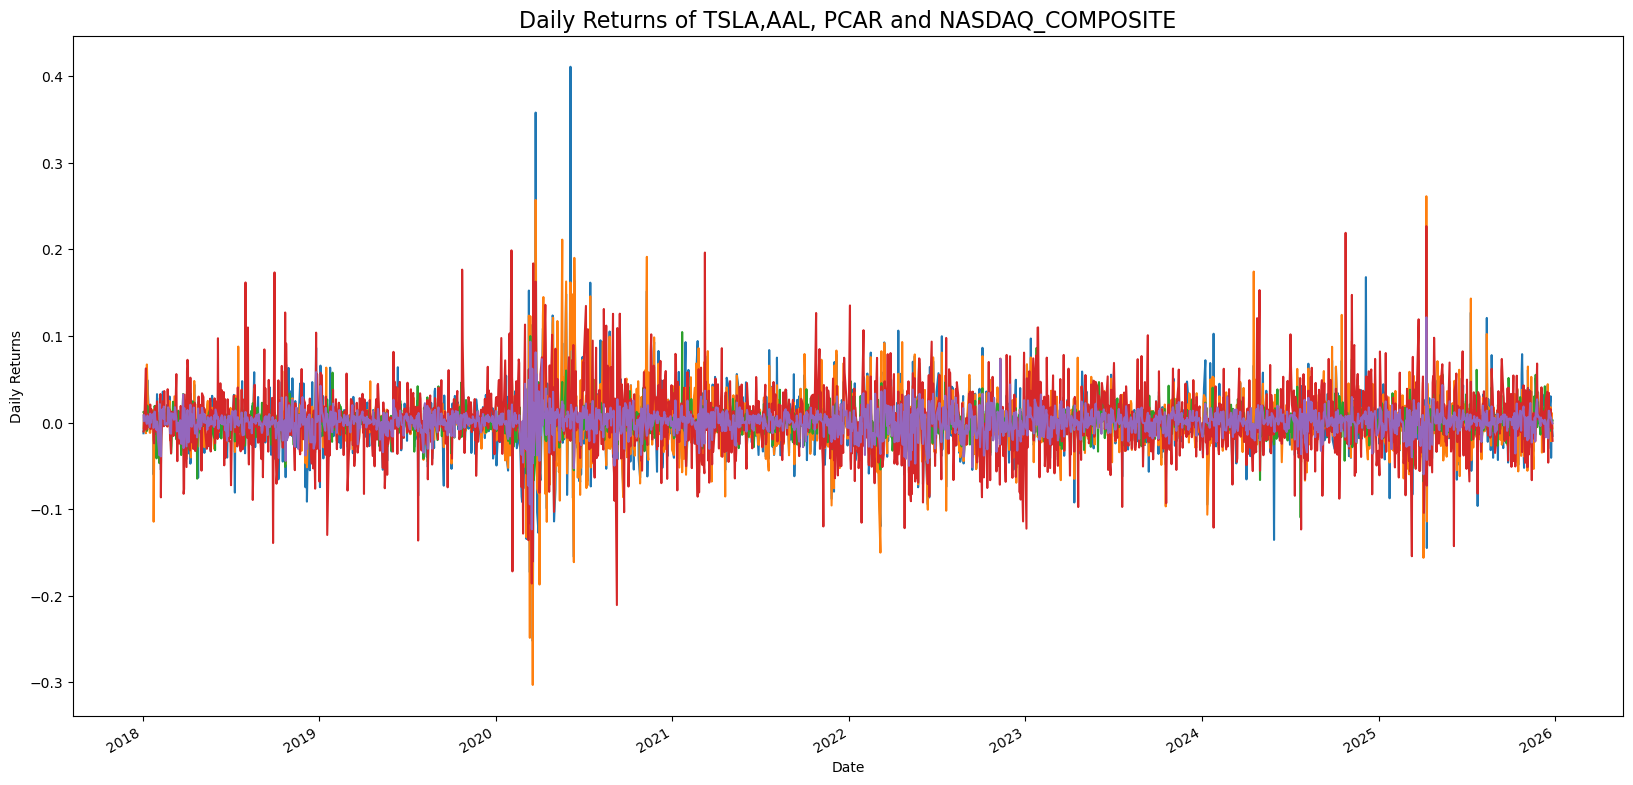

In [45]:
plt.figure(figsize = (20,10))
data_daily_returns.TSLA.plot()
data_daily_returns.AAL.plot()
data_daily_returns.PCAR.plot()
data_daily_returns.UAL.plot()
data_daily_returns['NASDAQ_COMPOSITE'].plot()
plt.title('Daily Returns of TSLA,AAL, PCAR and NASDAQ_COMPOSITE', fontsize=16)
plt.ylabel('Daily Returns')
plt.show()

In [46]:
X = data_daily_returns['NASDAQ_COMPOSITE'].values
Y = data_daily_returns.TSLA.values
Z = data_daily_returns.AAL.values
T = data_daily_returns.PCAR.values
Q = data_daily_returns.UAL.values

In [47]:
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    x = x[:,1]
    return model.params[0], model.params[1]

In [48]:
tslaalpha, tslabeta = linreg(X,Y)
print ('TSLA_alpha: ' + str(tslaalpha))
print ('TSLA_beta: ' + str(tslabeta))

TSLA_alpha: -0.0007382245822073705
TSLA_beta: 1.047836577228957


In [49]:
AALalpha,AALbeta = linreg(X,Z)
print ('AAL_alpha: ' + str(AALalpha))
print ('AAL_beta: ' + str(AALbeta))

AAL_alpha: 7.313604249525608e-05
AAL_beta: 1.0721916833706862


In [50]:
pcaralpha,pcarbeta = linreg(X,T)
print ('Pcar_alpha: ' + str(pcaralpha))
print ('Pcar_beta: ' + str(pcarbeta))

Pcar_alpha: 0.000275699105638012
Pcar_beta: 0.6075649053034546


In [51]:
ualalpha,ualbeta = linreg(X,T)
print ('UAL_alpha: ' + str(ualalpha))
print ('UAL_beta: ' + str(ualbeta))

UAL_alpha: 0.000275699105638012
UAL_beta: 0.6075649053034546


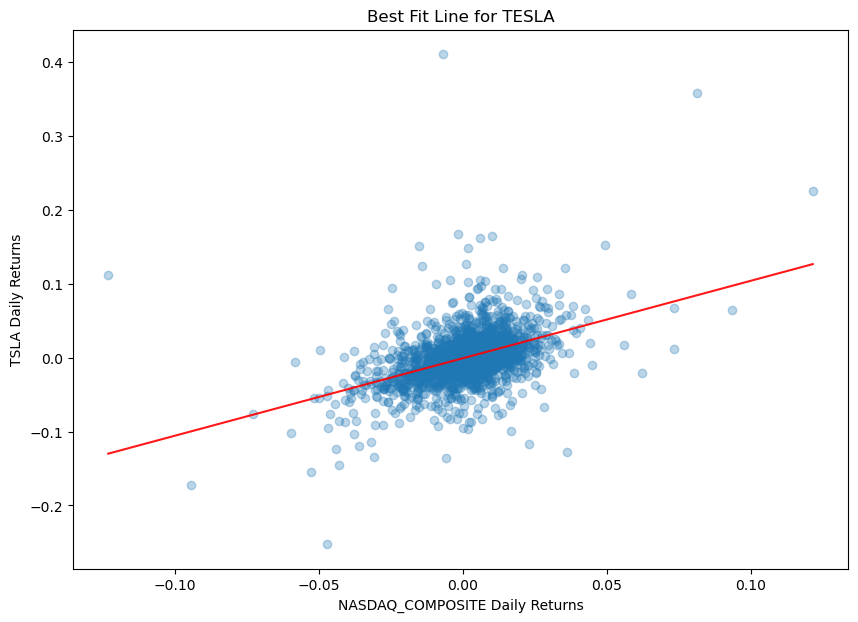

In [105]:
X1 = np.linspace(X.min(),X.max(),100)
Y_hat = X1*tslabeta + tslaalpha

plt.figure(figsize = (10,7))
plt.scatter(X, Y, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("TSLA Daily Returns")
plt.title("Best Fit Line for TESLA")

plt.plot(X1, Y_hat, 'r', alpha=0.9)
plt.show()

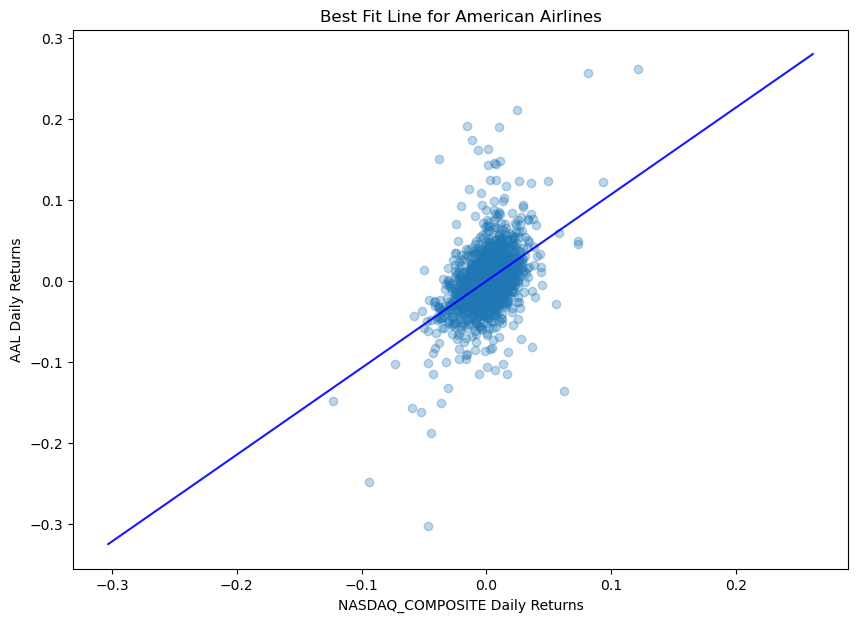

In [115]:
X2 = np.linspace(Z.min(),Z.max(),100)
Z_hat = X2*AALbeta + AALalpha

plt.figure(figsize = (10,7))
plt.scatter(X, Z, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("AAL Daily Returns")
plt.title("Best Fit Line for American Airlines")

plt.plot(X2, Z_hat, 'b', alpha=0.9)
plt.show()

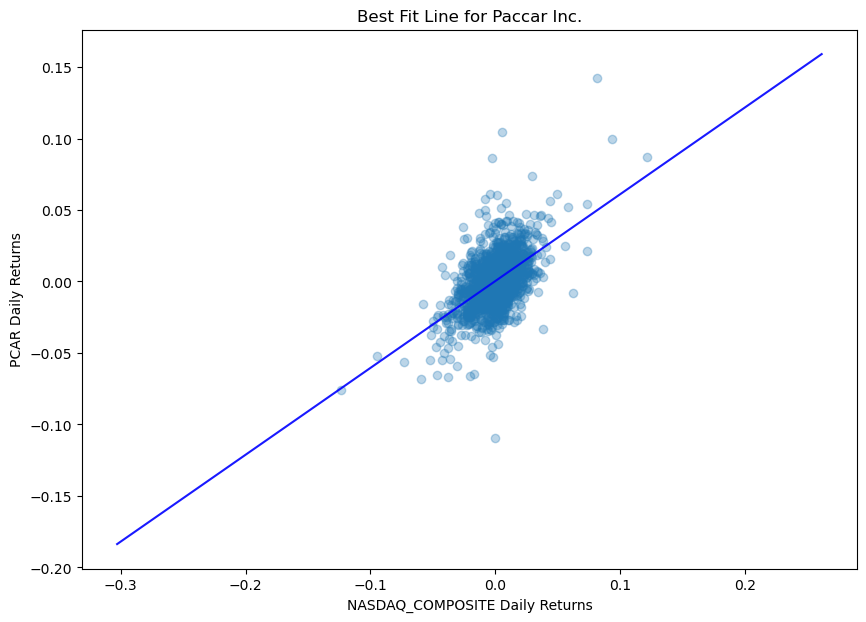

In [117]:
X2 = np.linspace(Z.min(),Z.max(),100)
Z_hat = X2*pcarbeta + pcaralpha

plt.figure(figsize = (10,7))
plt.scatter(X, T, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("PCAR Daily Returns")
plt.title("Best Fit Line for Paccar Inc.")

plt.plot(X2, Z_hat, 'b', alpha=0.9)
plt.show()

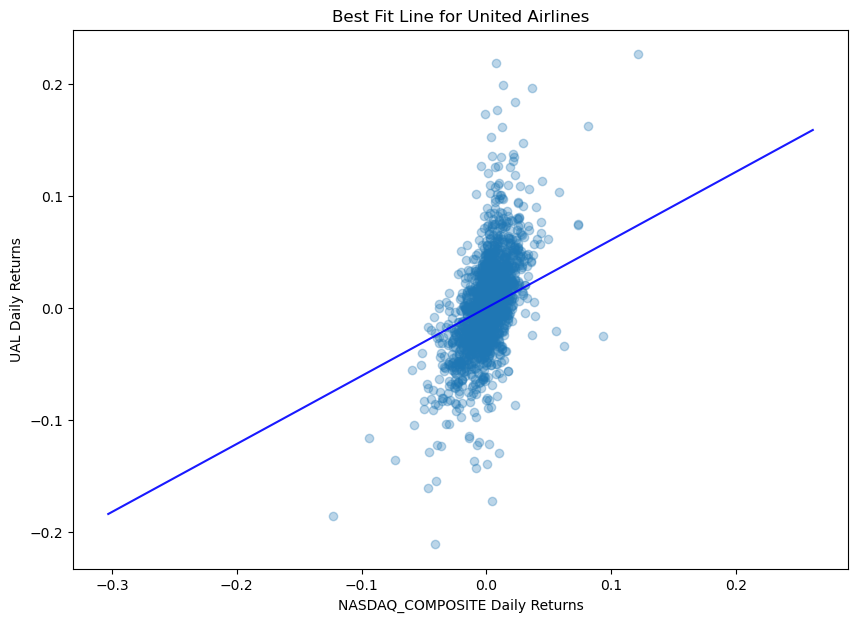

In [119]:
X3 = np.linspace(Z.min(),Z.max(),100)
Z_hat = X2*ualbeta + ualalpha

plt.figure(figsize = (10,7))
plt.scatter(X, Q, alpha=0.3) #plots the raw data
plt.xlabel("NASDAQ_COMPOSITE Daily Returns")
plt.ylabel("UAL Daily Returns")
plt.title("Best Fit Line for United Airlines")

plt.plot(X2, Z_hat, 'b', alpha=0.9)
plt.show()